# 1.7: Creating Network Visualizations

This scripts contains the following:

1. Importing Libraries
2. Importing relationship data
3. Create a graph from a pandas dataframe
4. Graph visualization - Networkx
5. Graph visualization - Pyvis
6. Community detection - Leiden algorithm
7. The most important countries in 20th_century Article

1. Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

2. Importing Relationship Data

In [35]:
relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [36]:
relationship_df.head()

,source,target,value
0,Italy,Russia,6
1,Germany,Russia,30
2,Bulgaria,Germany,6
3,Bulgaria,Russia,6
4,Germany,Italy,27


3. Create a graph from a pandas dataframe

In [37]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

4. Graph visualization - Networkx

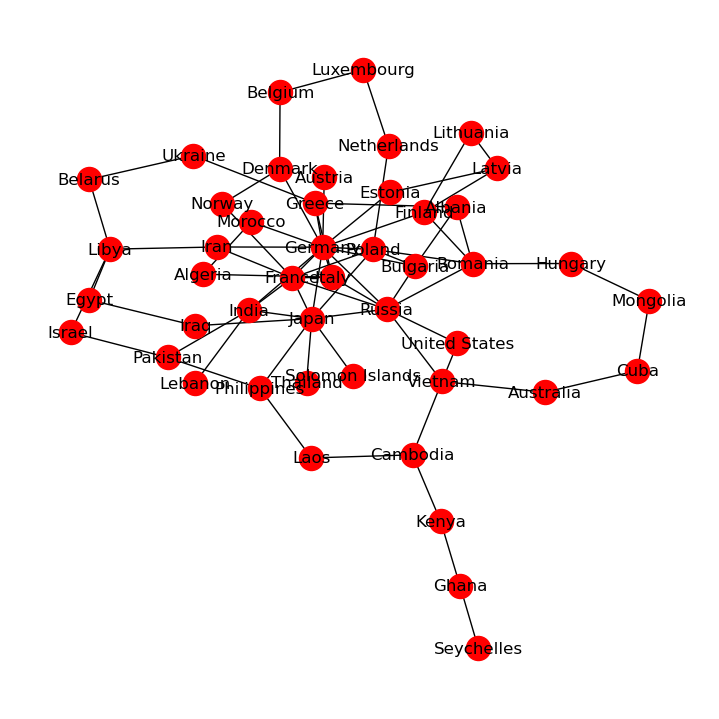

In [38]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

Based on the above diagram, Germany is in the central to the network. Also notice that Seychelles have an absence of connections.

In [39]:
h.savefig('networkx_plt_20thcenturycountries.png')

5. Graph visualization - Pyvis

In [40]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Once again, Germany is in the center, followed by Poland.

6.Community detection - Leiden algorithm

In [41]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [42]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [43]:
new_com = coms.to_node_community_map()

In [44]:
new_com

defaultdict(list,
            {'France': [0],
             'Poland': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Denmark': [0],
             'Norway': [0],
             'Japan': [0],
             'Thailand': [0],
             'Solomon Islands': [0],
             'India': [0],
             'Lebanon': [0],
             'Russia': [1],
             'Bulgaria': [1],
             'Albania': [1],
             'Romania': [1],
             'Hungary': [1],
             'Mongolia': [1],
             'Cuba': [1],
             'Australia': [1],
             'Vietnam': [1],
             'United States': [1],
             'Philippines': [2],
             'Pakistan': [2],
             'Laos': [2],
             'Cambodia': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Seychelles': [2],
             'Ukraine': [3],
             'Belarus': [3],
             'Libya': [3],
             'Egypt': [3],
            

In [45]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [46]:
dict_com

{'France': 0,
 'Poland': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Denmark': 0,
 'Norway': 0,
 'Japan': 0,
 'Thailand': 0,
 'Solomon Islands': 0,
 'India': 0,
 'Lebanon': 0,
 'Russia': 1,
 'Bulgaria': 1,
 'Albania': 1,
 'Romania': 1,
 'Hungary': 1,
 'Mongolia': 1,
 'Cuba': 1,
 'Australia': 1,
 'Vietnam': 1,
 'United States': 1,
 'Philippines': 2,
 'Pakistan': 2,
 'Laos': 2,
 'Cambodia': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Seychelles': 2,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Israel': 3,
 'Iran': 3,
 'Italy': 4,
 'Germany': 4,
 'Austria': 4,
 'Greece': 4,
 'Morocco': 4,
 'Algeria': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Finland': 5}

In [47]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


7. The most important countries in 20th_century Article

In [48]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Italy': 0.11111111111111112,
 'Russia': 0.17777777777777778,
 'Germany': 0.3111111111111111,
 'Bulgaria': 0.08888888888888889,
 'Austria': 0.022222222222222223,
 'France': 0.17777777777777778,
 'Poland': 0.13333333333333333,
 'Estonia': 0.044444444444444446,
 'Latvia': 0.06666666666666667,
 'Lithuania': 0.044444444444444446,
 'Finland': 0.08888888888888889,
 'Netherlands': 0.044444444444444446,
 'Luxembourg': 0.044444444444444446,
 'Belgium': 0.044444444444444446,
 'Denmark': 0.06666666666666667,
 'Norway': 0.044444444444444446,
 'Greece': 0.08888888888888889,
 'Albania': 0.06666666666666667,
 'Ukraine': 0.044444444444444446,
 'Belarus': 0.044444444444444446,
 'Libya': 0.08888888888888889,
 'Egypt': 0.044444444444444446,
 'Iraq': 0.044444444444444446,
 'Japan': 0.2,
 'Morocco': 0.044444444444444446,
 'Algeria': 0.044444444444444446,
 'Thailand': 0.022222222222222223,
 'Philippines': 0.06666666666666667,
 'Solomon Islands': 0.022222222222222223,
 'India': 0.11111111111111112,
 'Pakist

Notice, Germany has the highest score.

#Based on the provided degree centrality values for each country:

Germany has the highest degree centrality (0.311), indicating that it has the most connections with other countries in the network. This suggests that Germany plays a central role in the network and likely has strong diplomatic, economic, or social ties with many other countries.

Japan also has a relatively high degree centrality (0.2), suggesting significant connections with other countries in the network. This could be due to Japan's economic importance, trade relations, or diplomatic engagements with various nations.

Russia and France have similar degree centrality values (0.178), indicating that they are also well-connected within the network. These countries likely have diverse international relationships and engagements across different regions.

Italy and Poland have moderate degree centrality values (0.111 and 0.133, respectively). While they are not as central as Germany or Japan, they still maintain significant connections with other countries in the network.

Austria, Thailand, Solomon Islands, Seychelles, and Lebanon have the lowest degree centrality values (0.022), indicating fewer connections with other countries in the network. These countries may have relatively limited international engagements or dependencies compared to others.

In [49]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [50]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [51]:
# Sort degree_df by centrality score in descending order
degree_df_sorted = degree_df.sort_values(by='centrality', ascending=False)


In [52]:
# Select the top N countries
top_countries = 10  # Change this to the number of top countries you want to include
top_degree_df = degree_df_sorted.head(top_countries)


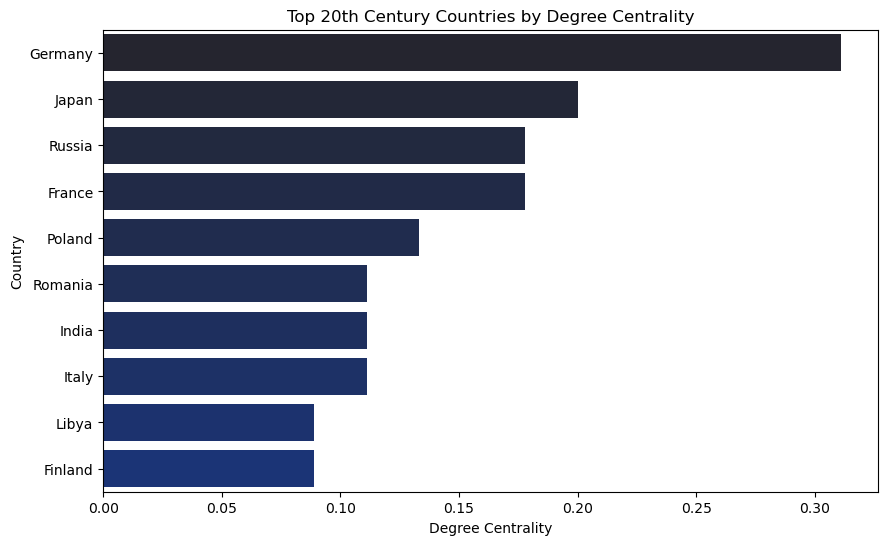

In [54]:
plt.figure(figsize=(10, 6))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="country",
                saturation=0.9, data=top_degree_df).set_title("Top 20th Century Countries by Degree Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Country")
plt.show()

In [55]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [56]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [57]:
# Sort closeness_df by centrality score in descending order
closeness_df_sorted = closeness_df.sort_values(by='centrality', ascending=False)


In [58]:
# Select the top 10 countries
top_countries = 10  #  top countries you want to include
top_closeness_df = closeness_df_sorted.head(top_countries)


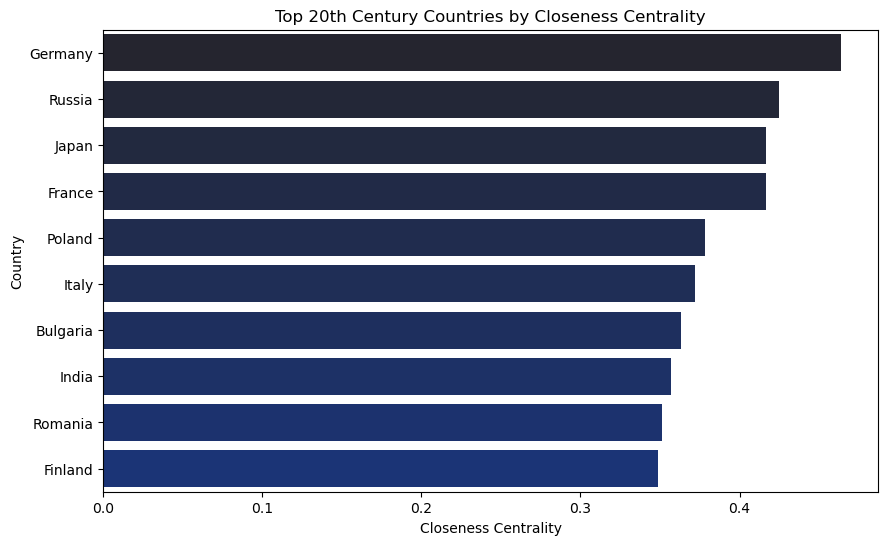

In [59]:
plt.figure(figsize=(10, 6))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="country",
                saturation=0.9, data=top_closeness_df).set_title("Top 20th Century Countries by Closeness Centrality")
plt.xlabel("Closeness Centrality")
plt.ylabel("Country")
plt.show()

In [60]:
#I filtered both plots only to show the top ten countries, to make it easier to read the plot.

Germany has the highest closeness centrality (0.45), indicating that it can reach other countries in the network relatively quickly. This suggests that Germany has efficient access to information or resources across the network and is well-positioned for communication or influence.

Russia, Japan and France follows with a closeness centrality of around 0.4, indicating that it also has efficient access to other countries in the network, albeit to a slightly lesser extent than Germany. This implies that Japan can maintain relatively close relationships or interactions with other nations.

While slightly lower than Germany and Japan, these values still suggest that Russia and France have relatively efficient access to other countries in the network and can establish connections or communications with them.

Poland has a closeness centrality of a little less that .4, indicating that it has moderately efficient access to other countries compared to the aforementioned nations.


These closeness centrality values provide insights into how quickly each country can reach others in the network, reflecting their potential influence, information flow, or accessibility within the network.

In [61]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [62]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [63]:
# Sort betweennes_df by centrality score in descending order
betweennes_df_sorted = betweennes_df.sort_values(by='centrality', ascending=False)


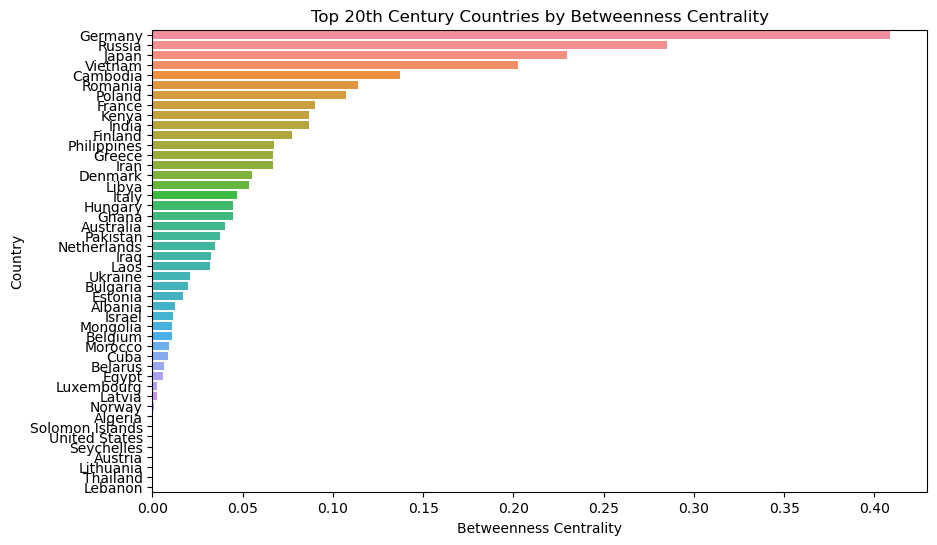

In [64]:
plt.figure(figsize=(10, 6))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="country",
                saturation=0.9, data=betweennes_df_sorted).set_title("Top 20th Century Countries by Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Country")
plt.show()

In [65]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [66]:
#Notice in all the above, Germany was the center, followed by Russia, Japan and Poland which is expected.